# **IMPORT THE ESSENTIALS**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('50_Startups.csv')

# **NORMALITY TEST**

This test is about identifying whether the given column is normally distributed or not

<ipython-input-3-916d015516e2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['R&D Spend'])


<Axes: xlabel='R&D Spend', ylabel='Density'>

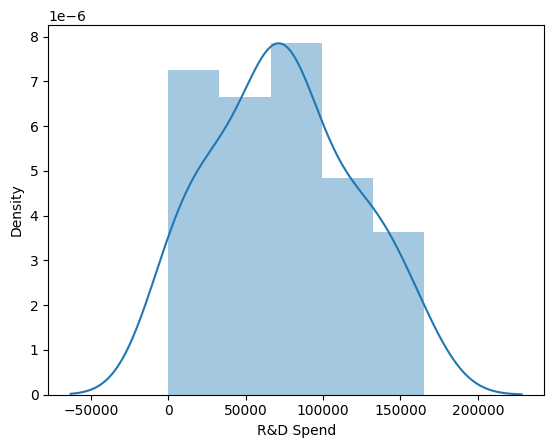

In [ ]:
import seaborn as sns
%matplotlib inline
sns.distplot(data['R&D Spend'])

In [ ]:
# Performing Hypothesis Testing
#
# Step1: Create a Viable Question
# |---- Question: Test whether R&D Spend is normally distributed or not
#
# Step2: Convert the Question into Hypothesis (H0 and Ha)
# |---- Null Hypothesis (H0) ----------------- R&D Spend is NOT normally distributed
# |---- Alternate Hypothesis (Ha | H1) ------- R&D Spend is normally distributed
#
# Step3: Select the Statistical Test Formula / Tool to validate the hypothesis
# |---- Shapiro Test
#
# Step4: Select the SL | Alpha Value ==== 0.05
# |---- SL =0.05
#
# Step5: Find the p-value from the test and compare the same with SL to identify which Hypothesis is passing
#
# EXCEPTION ALERT!!! --------- For Normality to pass Ha, pvalue >= SL

SL = 0.05

from scipy.stats import shapiro

corr, pvalue = shapiro( data['R&D Spend'] )

if pvalue >= SL:
  print("Alternate Hypothesis (Ha | H1): R&D Spend is normally distributed")
else:
  print("Null Hypothesis (H0): R&D Spend is NOT normally distributed")
print(f"- SL = {SL}")
print(f"- pvalue = {pvalue}\n\n")

Alternate Hypothesis (Ha | H1): R&D Spend is normally distributed
- SL = 0.05
- pvalue = 0.18005383014678955




**Classwork:** Hypothesis testing for normality of all columns

Alternate Hypothesis (Ha | H1): Administration is normally distributed
|---- SL = 0.05
|---- pvalue = 0.2887355253581867




<Axes: xlabel='Administration', ylabel='Count'>

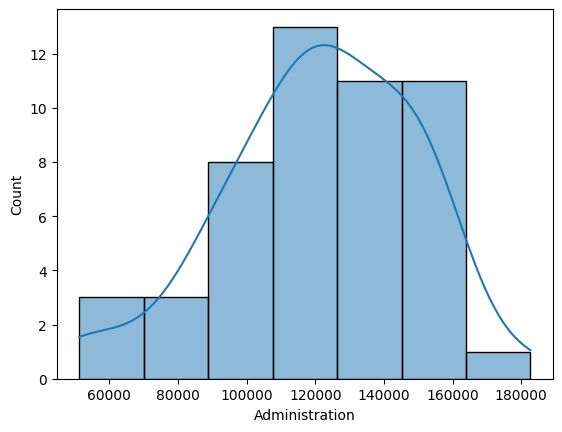

In [ ]:
# Column: Administration
# Test: normaltest

SL = 0.05

from scipy.stats import normaltest
nt = normaltest( data['Administration'] )
pvalue = nt.pvalue

if pvalue >= SL:
  print("Alternate Hypothesis (Ha | H1): Administration is normally distributed")
else:
  print("Null Hypothesis (H0): Administration is NOT normally distributed")
print(f"|---- SL = {SL}")
print(f"|---- pvalue = {pvalue}\n\n")

# visual confirmation
import seaborn as sns
%matplotlib inline
sns.histplot(data['Administration'], kde=True)

Alternate Hypothesis (Ha | H1): Marketing Spend is normally distributed
|---- SL = 0.05
|---- pvalue = 0.3450852632522583




<Axes: xlabel='Marketing Spend', ylabel='Count'>

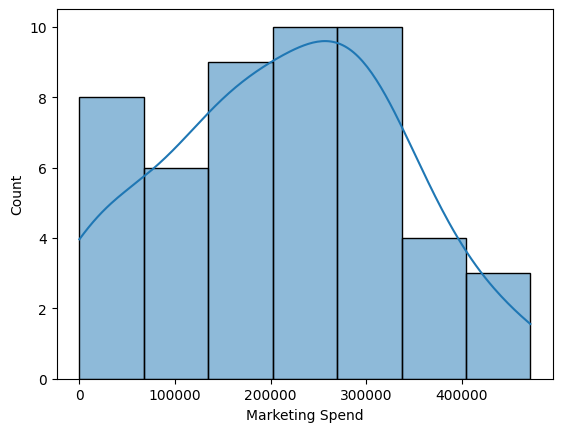

In [ ]:
# Column: Marketing Spend
# Test: shapiro

SL = 0.05

from scipy.stats import shapiro
corr, pvalue = shapiro( data['Marketing Spend'])

if pvalue >= SL:
  print("Alternate Hypothesis (Ha | H1): Marketing Spend is normally distributed")
else:
  print("Null Hypothesis (H0): Marketing Spend is NOT normally distributed")
print(f"|---- SL = {SL}")
print(f"|---- pvalue = {pvalue}\n\n")

# visual confirmation
import seaborn as sns
%matplotlib inline
sns.histplot(data['Marketing Spend'], kde=True)

# **MULTI-COLLINEARITY AND FEATURE ELIMINATION**
- **Logic:** Columns that have similar statistical significance are collinear
- **Multi-collinearity:** Columns that are statistically same
> - With respect to the data, given columns are different but statistically similar
> - eliminate 1 of the 2 collinear columns

- **Tests for Multi-collinearity and Feature Elimination**: 2 scenarios and their respective tests to identify multi-collinearity:
> - when dealing with **NUMERICAL data/columns**
>> 1. **Parametric Test:** if the given two columns are passing normality test **i.e.**  the given two columns are normally distributed</br>
>> 2. **Non parametric Test:** if the given two columns are failing normality test **i.e.** if the given two columns are not normally distributed
> - when dealing with **CATEGORICAL data/columns**
>> 3. **Chi-square Test:** (explained below)

- When there are more than 2 columns perform one:many tests instead of using tests that check all columns at once

**Example of Parametric test** (ensure both columns are normally distributed)

In [ ]:
# Performing Hypothesis Testing
#
# Step1: Create a Viable Question
# |---- To check whether to preserve R&D Spend	& Administration columns
#
# Step2: Convert the Question into Hypothesis (H0 and Ha)
# |---- h0 - R&D Spend and Admin are NOT unequal (multi-collinearity)
# |---- ha - R&D Spend and Admin are unequal (no multi-collinearity)
#
# Step3: Select the Statistical Test Formula / Tool to validate the hypothesis
# |---- Parametric test -------  Student t-test
#
# Step4: Select the SL | Alpha Value ==== 0.05
# |---- SL = 0.05
#
# Step5: Find the p-value from the test and compare the same with SL to identify which Hypothesis is passing

SL = 0.05

from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import f_oneway

corr, pvalue = ttest_ind( data['R&D Spend'] , data['Administration'] )

if pvalue <= SL:
  print("ha - R&D Spend and Admin have no statistical similarity. Thus preserve both")
else:
  print("h0 - R&D Spend and Admin have statistical similarity resulting in multicollinearity issue. Thus eliminate one of them")


ha - R&D Spend and Admin have no statistical similarity. Thus preserve both


In [ ]:
# Example of using ANOVA for parametric test (multi column test)
# |---- NOTE: This test is not recommended because we would NOT know which of the 2 columns (from all the given columns) failed the test. We need to understand the `culprit` column <---- INTERVIEW QUESTION
#
# ANOVA (f_oneway) is the only test that can accepts n/unlimited number of feature columns
# |---- what if there exists similarity in between `r&D` and `marketing` and by mistake I eliminate `Administration`
# |---- corr, pvalue = anova(data['R&D Spend'], data['Administration'], data['Marketing Spend'])

from scipy.stats import f_oneway

corr, pvalue = f_oneway( data['R&D Spend'] , data['Administration'])

if pvalue <= SL:
  print("ha - R&D Spend and Admin have no statistical similarity. Thus preserve both")
else:
  print("h0 - R&D Spend and Admin have statistical similarity resulting in multicollinearity issue. Thus eliminate one of them")


ha - R&D Spend and Admin have no statistical similarity. Thus preserve both


**Example of non parametric test** (ensure both columns are NOT normally distributed)

In [ ]:
# Performing Hypothesis Testing

SL = 0.05

from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
from scipy.stats import friedmanchisquare

corr, pvalue = wilcoxon( data['R&D Spend'] , data['Administration'] )

if pvalue <= SL:
  print("ha - R&D Spend and Admin have no statistical similarity. Thus preserve both")
else:
  print("h0 - R&D Spend and Admin have statistical similarity resulting in multicollinearity issue. Thus eliminate one of them")


ha - R&D Spend and Admin have no statistical similarity. Thus preserve both


**Chi-square Test** (applicable for Categorical Data)

Deal with features and label pair (atleast one of the columns should be catgorical in nature)
1. Feature is categorical and label is numerical
2. Feature is categorical and label is categorical
3. Feature is numerical and label is categorical

**Goal:** The goal of this test is to check whether there exists any kind of statistical relationship between feature and label columns. If a relationship exists, preserve the feature, else eliminate the feature

In [ ]:
# Performing Hypothesis Testing
#
# Step1: Create a Viable Question
# |---- To check whether to State and Profit have any kind of statistical relationship
#
# Step2: Convert the Question into Hypothesis (H0 and Ha)
# |---- h0 - State and Profit has NO statistical relationship
# |---- ha - State and Profit has statistical relationship
#
# Step3: Select the Statistical Test Formula / Tool to validate the hypothesis
# |---- Chisquare test
#
# Step4: Select the SL | Alpha Value ==== 0.05
# |---- SL = 0.05
#
# Step5: Find the p-value from the test and compare the same with SL to identify which Hypothesis is passing

# Step5.1: how to Create Pivot Table
# |---- pd.crosstab(feature,label)
# |---- This format is mandatory for chi-square testing

ct = pd.crosstab(data['State'],data['Profit'])
ct

Profit,14681.40,35673.41,42559.73,49490.75,64926.08,65200.33,69758.98,71498.49,77798.83,78239.91,...,149759.96,152211.77,155752.60,156122.51,156991.12,166187.94,182901.99,191050.39,191792.06,192261.83
State,,,,,,,,,,,,,,,,,,,,,
California,1,0,1,0,0,1,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
Florida,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
New York,0,1,0,0,1,0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,1


In [ ]:
SL = 0.05

from scipy.stats import chi2_contingency

_,_, pvalue,_ = chi2_contingency( ct )

if pvalue <= SL:
  print("ha - State and Profit have statistical relationship")
else:
  print("h0 - State and Profit do NOT have statistical relationship")


h0 - State and Profit do NOT have statistical relationship


In [ ]:
?chi2_contingency